In [47]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [5]:
df_covid_19 = pd.read_csv('datasets/covid_19_data.csv', index_col='SNo')

In [6]:
df_covid_19.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
df_covid_19.shape

(59759, 7)

# Tarefa
Crie uma “Nova Medida” chamada
“Active” para calcular o número de casos ativos, que é no caso é o valor da coluna
“Confirmed” menos a soma das colunas “Recovered” e “Deaths”. Crie gráficos para facilitar
a sua visualização de acordo com a questão.

In [11]:
#criando uma coluna nova no dataset essa é o total de casos ativos
df_covid_19['Active'] = df_covid_19['Confirmed'] - (df_covid_19['Deaths'] + df_covid_19['Recovered'])

In [12]:
df_covid_19

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
SNo,,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
59755,07/08/2020,Zacatecas,Mexico,2020-07-09 04:34:23,1212.0,128.0,791.0,293.0
59756,07/08/2020,Zakarpattia Oblast,Ukraine,2020-07-09 04:34:23,3533.0,121.0,1117.0,2295.0
59757,07/08/2020,Zaporizhia Oblast,Ukraine,2020-07-09 04:34:23,599.0,18.0,464.0,117.0


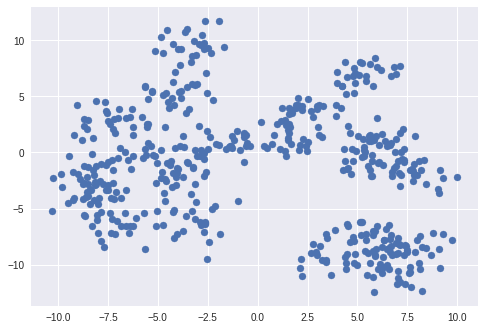

In [202]:
from math import sqrt #importando biblioteca de matematica do python | mais especifico de Raiz quadrada
from matplotlib import pyplot as plt # matplotlib é a biblioteca que gera graficos 
from sklearn.datasets import make_blobs #Gere "bolhas (grupos)" Gaussianos isotrópicos para agrupamento.
from sklearn.cluster import KMeans # biblioteca kmeans 

X, y = make_blobs(n_samples=500, centers=20, random_state=999) #gerano dados e armazenando em variaveis
# X armazena a posição em um plano cartesiano
# y amarzena o valor a qual grupo o X faz parte


plt.scatter(X[:,0], X[:,1]) #demonstando o Grafico

plt.show()


In [30]:
# pergunta 4 
#algoritmo K-Means seja executado buscando apenas 1 cluster

In [35]:
clusterModel = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)

In [36]:
clusterModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
clusterModel.cluster_centers_

array([[ 0.02618523, -1.30384304]])

### Pergunta 5
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [ ]:
# a soma dos quadrados intra-clusters (Within-Cluster-Sum-of-Squares) ou WCSS nada mais é que a função kmeans.inertia_

In [218]:
def optimal_number_of_clusters(wcss): # criando uma função no python
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

wcss = []
for i in range(5, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(i)

n = optimal_number_of_clusters(wcss)
print(sum(wcss))
print(n)

5
4717.404091931214
1


In [50]:
clusterModel.cluster_centers_[0][1]

-1.3038430386426754

In [212]:
kmeans.inertia_

6005.101775346179

4


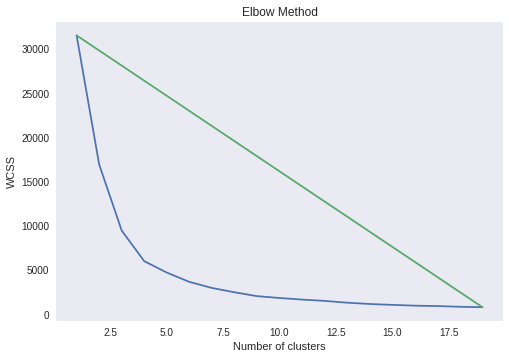

In [23]:
def optimal_number_of_clusters(wcss): # criando uma função no python
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [165]:
mainlnad_china = df_covid_19[df_covid_19['Country/Region'] == 'Mainland China'] # pegando os dados apenas da china
mainlnad_china['Last Update'] = pd.to_datetime(mainlnad_china['Last Update']).dt.date # tranformando a coluna em formato de data
mainlnad_china = mainlnad_china.groupby('Last Update').sum().reset_index()

/home/dsntos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [182]:
april = mainlnad_china[(mainlnad_china['Last Update'] > pd.to_datetime('2020-03-04')) &( mainlnad_china['Last Update'] < pd.to_datetime('2020-04-10'))]

In [184]:
april['2020-03-08']

,Last Update,Confirmed,Deaths,Recovered,Active
43,2020-03-05,80683.0,3022.0,52609.0,25052.0
44,2020-03-06,82188.0,3046.0,55521.0,23621.0
45,2020-03-07,80461.0,3072.0,55317.0,22072.0
46,2020-03-08,410370.0,16322.0,359978.0,34070.0
47,2020-03-09,76995.0,3072.0,55095.0,18828.0
48,2020-03-10,77201.0,3088.0,56620.0,17493.0
49,2020-03-11,97474.0,3310.0,78043.0,16121.0
50,2020-03-12,88954.0,3173.0,70958.0,14823.0
51,2020-03-13,79928.0,3181.0,63251.0,13496.0
52,2020-03-14,94005.0,3353.0,78566.0,12086.0


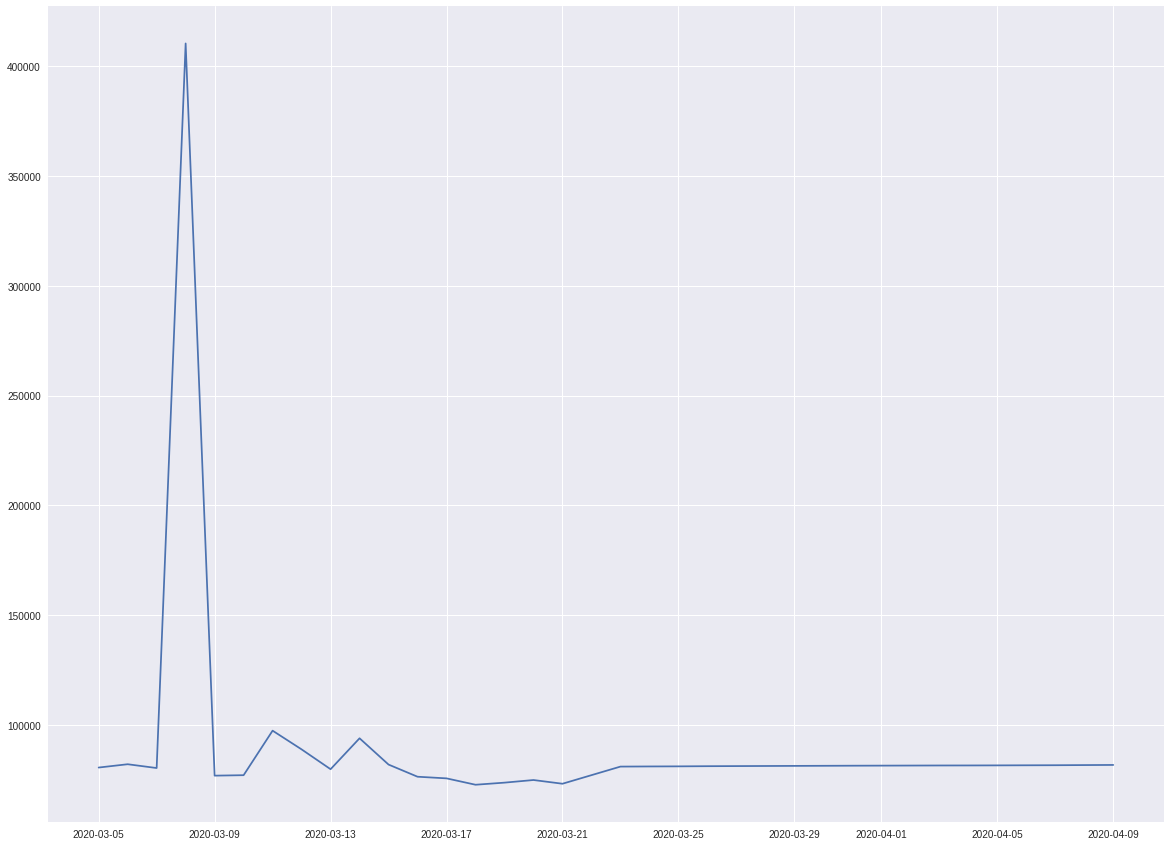

In [183]:
plt.figure(figsize=(20, 15))
plt.plot(april['Last Update'], april['Confirmed'])


In [190]:
mainlnad_china[mainlnad_china['Last Update'] == pd.to_datetime('2020-03-08')]['Last Update']

46    2020-03-08
Name: Last Update, dtype: object

In [201]:
pd.to_datetime('2020-03-08')

Timestamp('2020-03-08 00:00:00')

In [194]:
mainlnad_china.drop(pd.to_datetime('2020-03-08').dt.date, axis=0)

AttributeError: 'Timestamp' object has no attribute 'dt'

In [189]:
mainlnad_china['Last Update'].drop(mainlnad_china[mainlnad_china['Last Update'] == pd.to_datetime('2020-03-08')]['Last Update'])

KeyError: '[datetime.date(2020, 3, 8)] not found in axis'

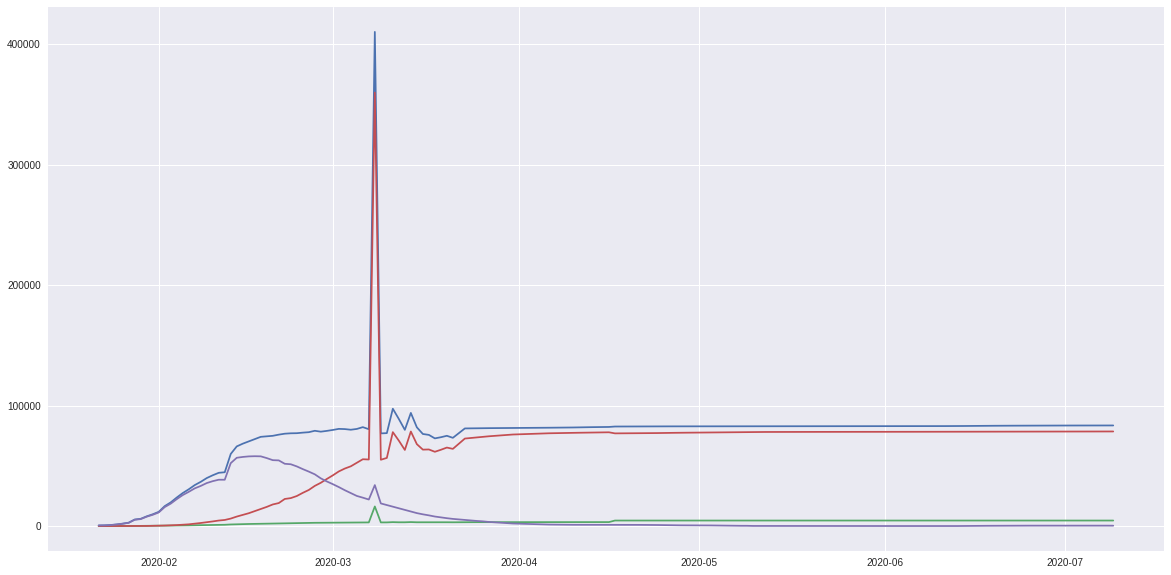

In [170]:
plt.figure(figsize=(20,10))
plt.plot(mainlnad_china['Last Update'], mainlnad_china['Confirmed'])
plt.plot(mainlnad_china['Last Update'], mainlnad_china['Deaths'])
plt.plot(mainlnad_china['Last Update'], mainlnad_china['Recovered'])
plt.plot(mainlnad_china['Last Update'], mainlnad_china['Active'])

plt.show()

In [86]:
data = mainlnad_china.groupby('Last Update').sum()

In [104]:
data.index

DatetimeIndex(['2020-01-22 17:00:00', '2020-01-23 17:00:00',
               '2020-01-24 17:00:00', '2020-01-25 17:00:00',
               '2020-01-26 16:00:00', '2020-01-27 23:59:00',
               '2020-01-28 23:00:00', '2020-01-29 19:30:00',
               '2020-01-30 16:00:00', '2020-01-31 15:20:00',
               ...
               '2020-06-30 04:33:48', '2020-07-01 04:33:52',
               '2020-07-02 04:33:46', '2020-07-03 04:33:54',
               '2020-07-04 04:33:51', '2020-07-05 04:33:46',
               '2020-07-06 04:33:57', '2020-07-07 04:34:00',
               '2020-07-08 05:33:48', '2020-07-09 04:34:23'],
              dtype='datetime64[ns]', name='Last Update', length=890, freq=None)

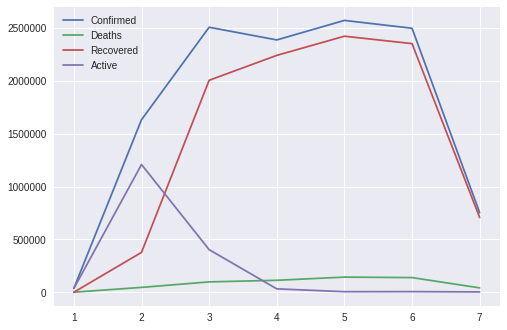

In [111]:
plt.plot(m.index, m['Confirmed'], label='Confirmed')
plt.plot(m.index, m['Deaths'], label='Deaths')
plt.plot(m.index, m['Recovered'], label='Recovered')
plt.plot(m.index, m['Active'], label='Active')

plt.legend()

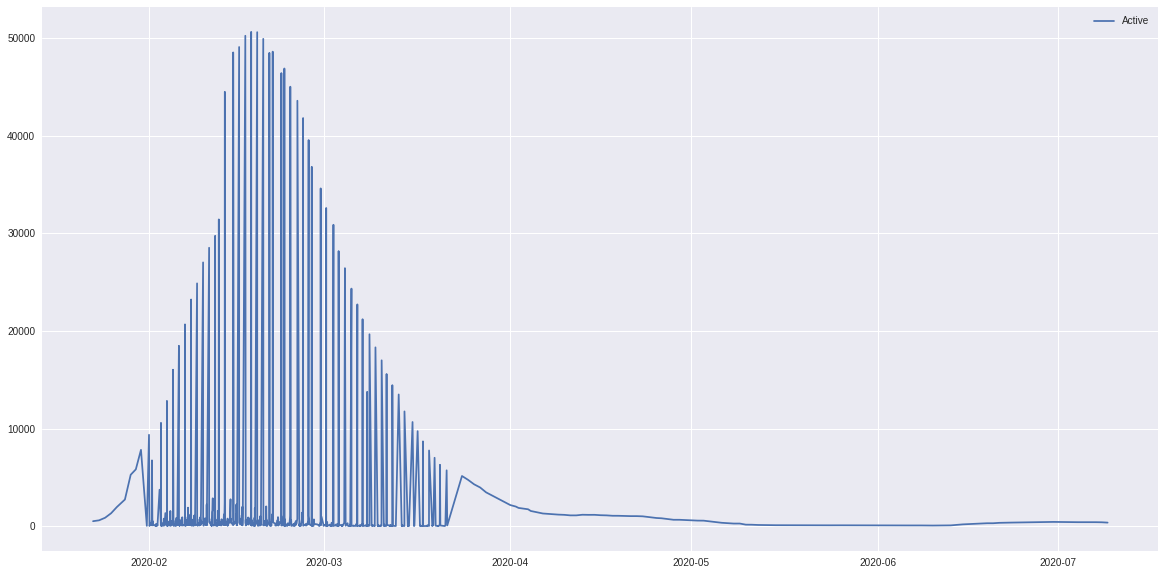

In [130]:
plt.figure(figsize=(20,10))
#plt.plot(day.index, day['Confirmed'], label='Confirmed')
#plt.plot(day.index, day['Deaths'], label='Deaths')
#plt.plot(day.index, day['Recovered'], label='Recovered')
plt.plot(day.index, day['Active'], label='Active')

plt.legend()

In [132]:
day.head(15)

,Confirmed,Deaths,Recovered,Active
Last Update,,,,
2020-01-22 17:00:00,547.0,17.0,28.0,502.0
2020-01-23 17:00:00,639.0,18.0,30.0,591.0
2020-01-24 17:00:00,916.0,26.0,36.0,854.0
2020-01-25 17:00:00,1399.0,42.0,39.0,1318.0
2020-01-26 16:00:00,2062.0,56.0,49.0,1957.0
2020-01-27 23:59:00,2863.0,82.0,58.0,2723.0
2020-01-28 23:00:00,5494.0,131.0,101.0,5262.0
2020-01-29 19:30:00,6070.0,133.0,120.0,5817.0
2020-01-30 16:00:00,8124.0,171.0,135.0,7818.0


In [115]:
day = mainlnad_china.groupby(mainlnad_china['Last Update']).sum()

In [153]:
m = mainlnad_china.groupby(mainlnad_china['Last Update']).sum().reset_index()

In [156]:
m.groupby(m['Last Update']).sum()

,Confirmed,Deaths,Recovered,Active
Last Update,,,,
2020-01-22 17:00:00,547.0,17.0,28.0,502.0
2020-01-23 17:00:00,639.0,18.0,30.0,591.0
2020-01-24 17:00:00,916.0,26.0,36.0,854.0
2020-01-25 17:00:00,1399.0,42.0,39.0,1318.0
2020-01-26 16:00:00,2062.0,56.0,49.0,1957.0
...,...,...,...,...
2020-07-05 04:33:46,83553.0,4634.0,78516.0,403.0
2020-07-06 04:33:57,83557.0,4634.0,78517.0,406.0
2020-07-07 04:34:00,83558.0,4634.0,78523.0,401.0


In [144]:
day.index.groupby(day.index)

{Timestamp('2020-01-22 17:00:00'): DatetimeIndex(['2020-01-22 17:00:00'], dtype='datetime64[ns]', name='Last Update', freq=None),
 Timestamp('2020-01-23 17:00:00'): DatetimeIndex(['2020-01-23 17:00:00'], dtype='datetime64[ns]', name='Last Update', freq=None),
 Timestamp('2020-01-24 17:00:00'): DatetimeIndex(['2020-01-24 17:00:00'], dtype='datetime64[ns]', name='Last Update', freq=None),
 Timestamp('2020-01-25 17:00:00'): DatetimeIndex(['2020-01-25 17:00:00'], dtype='datetime64[ns]', name='Last Update', freq=None),
 Timestamp('2020-01-26 16:00:00'): DatetimeIndex(['2020-01-26 16:00:00'], dtype='datetime64[ns]', name='Last Update', freq=None),
 Timestamp('2020-01-27 23:59:00'): DatetimeIndex(['2020-01-27 23:59:00'], dtype='datetime64[ns]', name='Last Update', freq=None),
 Timestamp('2020-01-28 23:00:00'): DatetimeIndex(['2020-01-28 23:00:00'], dtype='datetime64[ns]', name='Last Update', freq=None),
 Timestamp('2020-01-29 19:30:00'): DatetimeIndex(['2020-01-29 19:30:00'], dtype='datetime6

In [138]:
day['Last Update']

KeyError: 'Last Update'